In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px



In [2]:
# To read in fatalities
url3='https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx'
fatal = pd.read_excel(url3, sheet_name='Fatalities by County', skiprows=2)
fatal=fatal.truncate(before=0,after=253)
fatal.keys()
fatal=fatal.set_index("County Name")

from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
fatalDates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in fatal.keys()]  
fatal.columns=[pattern.findall(sub)[0]for sub in fatal.keys()]
fatal.index=fatal.index.str.title() # This is for all uppercase letters in index names

fatal = fatal.T.copy()

fatal

County Name,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,Bastrop,Baylor,Bee,Bell,Bexar,Blanco,Borden,Bosque,Bowie,Brazoria,Brazos,Brewster,Briscoe,Brooks,Brown,Burleson,Burnet,Caldwell,Calhoun,Callahan,Cameron,Camp,Carson,Cass,Castro,Chambers,Cherokee,Childress,Clay,Cochran,...,Stephens,Sterling,Stonewall,Sutton,Swisher,Tarrant,Taylor,Terrell,Terry,Throckmorton,Titus,Tom Green,Travis,Trinity,Tyler,Upshur,Upton,Uvalde,Val Verde,Van Zandt,Victoria,Walker,Waller,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09-25,32.0,9.0,83.0,18.0,1.0,1.0,32.0,9.0,5.0,8.0,30.0,1.0,34.0,86.0,1313.0,5.0,0.0,6.0,53.0,167.0,64.0,4.0,1.0,22.0,25.0,6.0,12.0,35.0,8.0,3.0,912.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,721.0,56.0,0.0,4.0,2.0,28.0,69.0,419.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,277.0,52.0,0.0,24.0,2.0,50.0,144.0,26.0,4.0,14.0,25.0,5.0,6.0,6.0,16.0
09-26,32.0,9.0,83.0,18.0,1.0,1.0,32.0,9.0,5.0,8.0,30.0,1.0,34.0,86.0,1313.0,5.0,0.0,6.0,53.0,167.0,64.0,4.0,1.0,22.0,25.0,6.0,12.0,35.0,8.0,3.0,912.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,721.0,56.0,0.0,4.0,2.0,28.0,69.0,419.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,278.0,52.0,0.0,24.0,2.0,50.0,144.0,26.0,4.0,14.0,25.0,5.0,6.0,6.0,16.0
09-27,32.0,9.0,83.0,18.0,1.0,1.0,32.0,9.0,5.0,8.0,30.0,1.0,34.0,86.0,1313.0,5.0,0.0,6.0,53.0,167.0,64.0,4.0,1.0,22.0,25.0,6.0,12.0,35.0,8.0,3.0,912.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,721.0,56.0,0.0,4.0,2.0,28.0,69.0,419.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,278.0,52.0,0.0,24.0,2.0,50.0,144.0,26.0,4.0,14.0,25.0,5.0,6.0,6.0,16.0
09-28,32.0,9.0,83.0,18.0,1.0,1.0,32.0,9.0,5.0,8.0,30.0,1.0,34.0,86.0,1313.0,5.0,0.0,6.0,53.0,167.0,64.0,4.0,1.0,22.0,25.0,6.0,12.0,35.0,8.0,3.0,912.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,721.0,56.0,0.0,4.0,2.0,28.0,69.0,419.0,7.0

In [3]:
#Read in cases
import pandas as pd
url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyCaseCountData.xlsx" #  sheets 'COVID-19 Cases', 'COVID-19 Fatalities'
df = pd.read_excel(url , sheet_name = 'Cases by County',skiprows=2)
df=df.truncate(before=0,after=253)  # There are extra rows in the file, just remove, should look for last county, but this is easier
df2 = df.set_index('County Name')
from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in df2.keys()]   
df3 = df2
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
df3.columns=[pattern.findall(sub)[0] for sub in df3.keys()]
cases=df3.T.copy()
cases

County Name,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,Bastrop,Baylor,Bee,Bell,Bexar,Blanco,Borden,Bosque,Bowie,Brazoria,Brazos,Brewster,Briscoe,Brooks,Brown,Burleson,Burnet,Caldwell,Calhoun,Callahan,Cameron,Camp,Carson,Cass,Castro,Chambers,Cherokee,Childress,Clay,Cochran,...,Stephens,Sterling,Stonewall,Sutton,Swisher,Tarrant,Taylor,Terrell,Terry,Throckmorton,Titus,Tom Green,Travis,Trinity,Tyler,Upshur,Upton,Uvalde,Val Verde,Van Zandt,Victoria,Walker,Waller,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09-26,2840.0,425.0,2144.0,323.0,87.0,13.0,1144.0,499.0,219.0,157.0,1818.0,19.0,1814.0,5473.0,44347.0,144.0,1.0,323.0,1370.0,11281.0,6292.0,218.0,12.0,317.0,570.0,338.0,729.0,1523.0,821.0,88.0,22698.0,355.0,23.0,370.0,257.0,1309.0,1547.0,69.0,90.0,52.0,...,134.0,5.0,14.0,81.0,109.0,45431.0,1485.0,3.0,242.0,8.0,1458.0,2241.0,29073.0,196.0,216.0,387.0,25.0,781.0,2168.0,586.0,4046.0,3701.0,855.0,128.0,638.0,13651.0,1364.0,48.0,1741.0,188.0,1213.0,8565.0,892.0,118.0,760.0,525.0,224.0,314.0,333.0,357.0
09-27,2840.0,425.0,2144.0,323.0,87.0,13.0,1144.0,499.0,219.0,157.0,1818.0,19.0,1814.0,5473.0,44416.0,144.0,1.0,324.0,1370.0,11281.0,6332.0,218.0,12.0,317.0,570.0,338.0,729.0,1523.0,821.0,88.0,22698.0,355.0,23.0,370.0,257.0,1309.0,1547.0,69.0,90.0,52.0,...,134.0,5.0,14.0,81.0,109.0,45671.0,1485.0,3.0,242.0,8.0,1458.0,2253.0,29130.0,196.0,216.0,387.0,25.0,783.0,2186.0,586.0,4046.0,3709.0,856.0,128.0,640.0,13686.0,1364.0,48.0,1741.0,188.0,1214.0,8565.0,892.0,118.0,760.0,525.0,224.0,314.0,333.0,357.0
09-28,2840.0,425.0,2144.0,323.0,87.0,13.0,1234.0,499.0,219.0,176.0,1818.0,19.0,1820.0,5473.0,46829.0,144.0,1.0,324.0,1377.0,11395.0,6332.0,218.0,12.0,317.0,570.0,339.0,729.0,1523.0,842.0,88.0,22698.0,355.0,23.0,372.0,257.0,1309.0,1547.0,69.0,90.0,52.0,...,134.0,5.0,14.0,81.0,109.0,45851.0,1485.0,3.0,242.0,8.0,1459.0,2257.0,29252.0,196.0,216.0,389.0,25.0,785.0,2186.0,586.0,4046.0,3709.0,85

In [4]:
# read in ICU data
icu = pd.read_excel("https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx", sheet_name= 'COVID-19 ICU', skiprows=2)
icu = icu.truncate(before=0, after=21)
icu

,TSA ID,TSA AREA,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,...,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30
0,A.,Amarillo,4.0,5.0,5.0,2.0,6.0,9.0,5.0,10.0,6.0,6.0,21.0,21.0,17.0,19.0,26.0,29.0,34.0,39.0,37.0,37.0,40.0,47.0,44.0,41.0,40.0,51.0,48.0,46.0,43.0,43.0,43.0,36.0,35.0,31.0,33.0,30.0,24.0,22.0,...,20.0,21.0,21.0,20.0,19.0,20.0,18.0,18.0,16.0,16.0,16.0,17.0,19.0,19.0,21.0,21.0,21.0,21.0,21.0,23.0,22.0,23.0,22.0,31.0,34.0,35.0,35.0,31.0,35.0,28.0,28.0,34.0,33.0,28.0,32.0,32.0,32.0,32.0,32.0,32.0
1,B.,Lubbock,12.0,12.0,14.0,15.0,14.0,17.0,16.0,18.0,17.0,19.0,15.0,15.0,15.0,18.0,18.0,18.0,16.0,19.0,30.0,28.0,26.0,24.0,24.0,26.0,24.0,20.0,17.0,15.0,14.0,13.0,15.0,13.0,15.0,14.0,16.0,14.0,13.0,12.0,...,39.0,37.0,37.0,41.0,40.0,37.0,36.0,31.0,30.0,27.0,26.0,27.0,25.0,22.0,26.0,26.0,25.0,29.0,31.0,36.0,39.0,37.0,34.0,39.0,40.0,40.0,33.0,34.0,40.0,39.0,40.0,42.0,38.0,39.0,39.0,39.0,43.0,44.0,44.0,47.0
2,C.,Wichita Falls,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,6.0,19.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,5.0,4.0,6.0,6.0,6.0,8.0,8.0,9.0,9.0,7.0,9.0,9.0,9.0,7.0,7.0,7.0,5.0,4.0,3.0,5.0,5.0
3,D.,Abilene,2.0,3.0,0.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,26.0,10.0,27.0,16.0,15.0,15.0,13.0,14.0,13.0,15.0,15.0,18.0,19.0,15.0,14.0,12.0,13.0,12.0,12.0,12.0,9.0,9.0,12.0,13.0,13.0,13.0,13.0,13.0,9.0,5.0,5.0,6.0,6.0,6.0,4.0,6.0,9.0,10.0,6.0,8.0
4,E.,Dallas/Ft. Worth,161.0,256.0,150.0,215.0,224.0,221.0,190.0,196.0,188.0,172.0,183.0,199.0,204.0,188.0,179.0,188.0,220.0,247.0,225.0,245.0,250.0,198.0,172.0,235.0,253.0,253.0,243.0,239.0,219.0,190.0,231.0,234.0,248.0,253.0,246.0,203.0,204.0,234.0,...,314.0,310.0,315.0,300.0,306.0,295.0,300.0,285.0,289.0,285.0,272.0,273.0,251.0,227.0,267.0,247.0,240.0,239.0,234.0,234.0,215.0,210.0,215.0,221.0,195.0,204.0,215.0,208.0,201.0,206.0,194.0,194.0,194.0,201.0,209.0,226.0,216.0,209.0,220.0,246.0
5,F.,Paris,12.0,11.0,9.0,8.0,7.0,7.0,8.0,9.0,9.0,10.0,10.0,9.0,10.0,9.0,11.0,11.0,8.0,7.0,8.0,10.0,9.0,7.0,5.0,3.0,4.0,6.0,5.0,5.0,7.0,9.0,7.0,5.0,6.0,7.0,8.0,8.0,9.0,6.0,...,57.0,24.0,57.0,25.0,25.0,23.0,24.0,21.0,29.0,31.0,29.0,31.0,29.0,29.0,33.0,29.0,27.0,31.0,30.0,29.0,30.0,26.0,26.0,29.0,27.0,26.0,28.0,24.0,31.0,32.0,38.0,46.0,44.0,41.0,43.0,40.0,40.0,40.0,39.0,38.0
6,G.,Longview/Tyler,16.0,13.0,17.0,18.0,17.0,17.0,14.0,16.0,20.0,18.0,28.0,21.0,22.0,23.0,23.0,24.0,22.0,22.0,20.0,25.0,26.0,34.0,26.0,22.0,24.0,21.0,19.0,24.0,22.0,21.0,23.0,20.0,21.0,25.0,21.0,17.0,16.0,16.0,...,63.0,65.0,67.0,67.0,65.0,66.0,67.0,65.0,66.0,69.0,71.0,71.0,73.0,74.0,69.0,65.0,69.0,65.0,63.0,64.0,63.0,62.0,59.0,63.0,64.0,64.0,63.0,65.0,62.0,59.0,53.0,48.0,50.0,49.0,48.0,51.0,52.0,56.0,59.0,63.0
7,H.,Lufkin,5.0,4.0,5.0,2.0,7.0,5.0,15.0,10.0,9.0,9.0,8.0,8.0,6.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,2.0,5.0,5.0,4.0,3.0,6.0,3.0,6.0,2.0,11.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,...,21.0,22.0,19.0,21.0,16.0,23.0,21.0,21.0,16.0,19.0,20.0,21.0,20.0,19.0,22.0,20.0,18.0,14.0,23.0,20.0,19.0,17.0,15.0,17.0,18.0,16.0,12.0,17.0,10.0,14.0,26.0,23.0,25.0,24.

In [5]:
# read in hospitalization 
hosp = pd.read_excel("https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx", sheet_name= 'COVID-19 Hospitalizations', skiprows=2)
hosp = hosp.truncate(before=0, after=21)
#hosp=hosp.T.copy()
hosp

,TSA ID,TSA AREA,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,...,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30
0,A.,Amarillo,17.0,17.0,17.0,40.0,18.0,24.0,18.0,35.0,17.0,17.0,41.0,41.0,40.0,46.0,59.0,64.0,67.0,82.0,84.0,87.0,91.0,101.0,94.0,90.0,96.0,109.0,112.0,109.0,103.0,98.0,94.0,82.0,84.0,79.0,80.0,72.0,68.0,70.0,...,56.0,61.0,59.0,55.0,51.0,49.0,51.0,49.0,47.0,47.0,46.0,48.0,51.0,54.0,55.0,56.0,57.0,54.0,53.0,47.0,44.0,42.0,46.0,68.0,72.0,70.0,71.0,62.0,63.0,63.0,63.0,74.0,74.0,73.0,79.0,84.0,83.0,84.0,82.0,82.0
1,B.,Lubbock,34.0,35.0,31.0,34.0,32.0,38.0,35.0,32.0,32.0,46.0,28.0,25.0,27.0,32.0,26.0,29.0,29.0,31.0,38.0,36.0,37.0,29.0,30.0,33.0,37.0,32.0,28.0,27.0,25.0,23.0,25.0,19.0,22.0,21.0,20.0,19.0,20.0,21.0,...,85.0,80.0,81.0,83.0,80.0,82.0,78.0,86.0,82.0,87.0,85.0,89.0,82.0,76.0,75.0,64.0,66.0,70.0,68.0,85.0,81.0,83.0,84.0,90.0,86.0,84.0,75.0,74.0,90.0,92.0,102.0,98.0,91.0,100.0,108.0,107.0,118.0,115.0,117.0,118.0
2,C.,Wichita Falls,5.0,5.0,6.0,4.0,5.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,45.0,35.0,41.0,26.0,23.0,24.0,27.0,21.0,24.0,22.0,29.0,28.0,29.0,25.0,24.0,26.0,29.0,26.0,33.0,34.0,29.0,31.0,28.0,27.0,31.0,31.0,36.0,39.0,29.0,26.0,24.0,25.0,25.0,25.0,26.0,30.0,27.0,26.0,25.0,26.0
3,D.,Abilene,6.0,7.0,2.0,6.0,5.0,8.0,3.0,10.0,6.0,7.0,11.0,9.0,9.0,6.0,6.0,7.0,6.0,4.0,4.0,4.0,4.0,6.0,4.0,5.0,3.0,3.0,2.0,1.0,3.0,5.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,...,39.0,23.0,40.0,29.0,27.0,27.0,23.0,26.0,27.0,29.0,30.0,36.0,37.0,31.0,30.0,23.0,26.0,25.0,28.0,30.0,27.0,27.0,29.0,30.0,29.0,31.0,32.0,31.0,28.0,15.0,19.0,23.0,23.0,21.0,15.0,17.0,20.0,24.0,22.0,28.0
4,E.,Dallas/Ft. Worth,369.0,365.0,373.0,449.0,470.0,476.0,428.0,435.0,410.0,443.0,477.0,517.0,550.0,521.0,472.0,491.0,583.0,611.0,576.0,636.0,635.0,530.0,513.0,674.0,679.0,669.0,676.0,650.0,569.0,530.0,678.0,627.0,666.0,680.0,685.0,551.0,553.0,646.0,...,1011.0,969.0,963.0,925.0,931.0,910.0,880.0,883.0,851.0,831.0,845.0,828.0,801.0,778.0,893.0,761.0,677.0,798.0,771.0,780.0,750.0,741.0,762.0,776.0,742.0,732.0,754.0,754.0,733.0,754.0,749.0,772.0,784.0,785.0,807.0,804.0,804.0,805.0,832.0,898.0
5,F.,Paris,14.0,16.0,21.0,18.0,15.0,12.0,12.0,17.0,16.0,19.0,19.0,17.0,19.0,17.0,17.0,19.0,18.0,14.0,16.0,18.0,19.0,17.0,16.0,16.0,13.0,16.0,16.0,12.0,14.0,16.0,16.0,14.0,11.0,13.0,15.0,14.0,14.0,12.0,...,108.0,76.0,110.0,78.0,76.0,72.0,72.0,69.0,67.0,64.0,74.0,77.0,77.0,72.0,74.0,74.0,69.0,71.0,71.0,81.0,82.0,70.0,74.0,78.0,69.0,69.0,67.0,64.0,67.0,66.0,85.0,90.0,85.0,85.0,94.0,91.0,99.0,104.0,106.0,104.0
6,G.,Longview/Tyler,32.0,26.0,33.0,32.0,36.0,43.0,36.0,42.0,45.0,47.0,60.0,43.0,48.0,47.0,54.0,53.0,54.0,53.0,53.0,63.0,68.0,96.0,67.0,54.0,57.0,53.0,50.0,55.0,49.0,46.0,43.0,39.0,40.0,45.0,40.0,37.0,41.0,40.0,...,203.0,202.0,196.0,206.0,192.0,198.0,199.0,204.0,206.0,213.0,222.0,220.0,220.0,218.0,201.0,185.0,194.0,200.0,180.0,174.0,188.0,172.0,172.0,168.0,169.0,170.0,177.0,164.0,159.0,157.0,151.0,159.0,153.0,159.0,168.0,158.0,155.0,174.0,179.0,190.0
7,H.,Lufkin,15.0,18.0,23.0,15.0,28.0,24.0,37.0,27.0,24.0,24.0,25.0,23.0,23.0,20.0,21.0,22.0,18.0,19.0,18.0,16.0,20.0,16.0,17.0,18.0,14.0,11.0,13.0,12.0,18.0,13.0,13.0,13.0,11.0,13.0,14.0,1

In [6]:
TSA1 = [["Anderson", "Briscoe","Carson" ,"Childress" ,"Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill","Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ],
        ['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King','Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum'],
        ['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young'],
        ['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 
         'Stephens', 'Stonewall', 'Taylor','Throckmorton'],
        ['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto',
         'Parker','Rockwall','Somervell','Tarrant','Wise'],
        ['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus'],
        ['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 
         'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood'],
        ['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler'],
        ['Culberson','El Paso', 'Hudspeth'],
        ['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves',
         'Terrell','Upton','Ward','Winkler'],
        ['Coke','Concho','Crockett','Irion','Kimble','Mason','Mcculloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton',
         'Tom Green'],
        ['Bell','Coryell','Hamilton','Lampasas','Milam','Mills'],
        ['Bosque','Falls','Hill','Limestone','Mclennan'],
        ['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington'],
        ['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson'],
        ['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr',
         'Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala'],
        ['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton'],
        ['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange'],
        ['Calhoun','De Witt','Goliad','Jackson','Lavaca','Victoria'],
        ['Jim Hogg','Webb','Zapata'],
        ['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'Mcmullen','Nueces','Refugio','San Patricio'],
        ['Cameron','Hidalgo','Starr','Willacy']]

In [7]:
#Extracting TSA A County Data for merging all number of fatalities in for complete TSA 
TSA2 = [["Anderson", "Briscoe","Carson" ,"Childress" ,"Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill","Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ],
        ['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King','Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum'],
        ['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young'],
        ['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 
         'Stephens', 'Stonewall', 'Taylor','Throckmorton'],
        ['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto',
         'Parker','Rockwall','Somervell','Tarrant','Wise'],
        ['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus'],
        ['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 
         'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood'],
        ['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler'],
        ['Culberson','El Paso', 'Hudspeth'],
        ['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves',
         'Terrell','Upton','Ward','Winkler'],
        ['Coke','Concho','Crockett','Irion','Kimble','Mason','McCulloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton',
         'Tom Green'],
        ['Bell','Coryell','Hamilton','Lampasas','Milam','Mills'],
        ['Bosque','Falls','Hill','Limestone','McLennan'],
        ['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington'],
        ['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson'],
        ['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr',
         'Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala'],
        ['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton'],
        ['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange'],
        ['Calhoun','DeWitt','Goliad','Jackson','Lavaca','Victoria'],
        ['Jim Hogg','Webb','Zapata'],
        ['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'McMullen','Nueces','Refugio','San Patricio'],
        ['Cameron','Hidalgo','Starr','Willacy']]

(-0.24017923845913797, 0.281640904073838)
(-0.08119778871904615, 0.7194347608210975)
(-0.21228213165948895, 0.3429047574490164)
(0.03232932428307894, 0.8864296961402547)
(-0.06343700801468535, 0.7791246771191385)
(-0.0505070383667531, 0.8233699602605506)


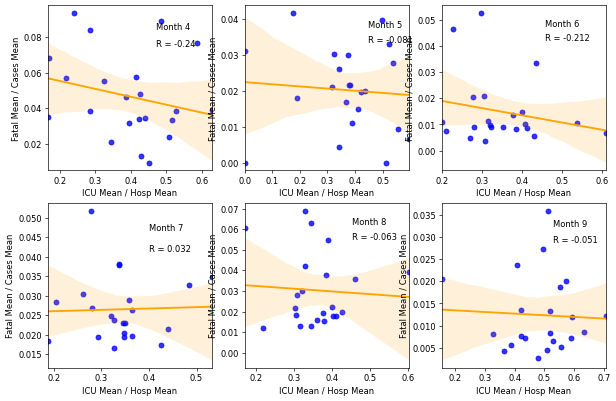

In [37]:
from scipy import stats
import seaborn as sns
fig = plt.figure(figsize=(12,8), dpi=60)

j=0
for i in range(3,160,30):
  j=j+1
  st=i
  se=st+30
  sp=30
  #-------------------
  fatalR=[fatal[region][st+32:se+32].sum(axis=1) for region in TSA1]  # Sum counties to health region
  FS=[]
  for FR in fatalR:
    FS.append(FR.diff().sum())
  FM=np.divide(FS, sp)

  #--------------------
  casesR=[cases[region][st+32:se+32].sum(axis=1) for region in TSA2]  # Sum counties to health region
  CS=[]  
  for CR in casesR:
    CS.append(CR.diff().sum())
  CM=np.divide(CS, sp)

  #-------------------------------------
  HM=[]
  for i in range(len(hosp)):
    temp=hosp.iloc[i,st:se]
    HM.append(temp.sum()/sp)
  HM=np.array(HM)


  #----------------------------
  ICUM=[]
  for i in range(len(icu)):
    temp=icu.iloc[i,st:se]
    ICUM.append(temp.sum()/len(temp))
  ICUM=np.array(ICUM)

  #--------------------
  X = ICUM/HM
  Y = FM/CM
  ax1 = fig.add_subplot(2,3,j)
  sns.regplot(x=X, y=Y,fit_reg=True,color='blue',line_kws={"color":"orange"})
  ax1.set_xlabel("ICU Mean / Hosp Mean")
  ax1.set_ylabel("Fatal Mean / Cases Mean")
  ax1.text(max(ICUM/HM)*0.75,max(FM/CM)*0.8,'R = '+str(stats.pearsonr(ICUM/HM, FM/CM)[0].round(3)))
  ax1.text(max(ICUM/HM)*0.75,max(FM/CM)*0.9,'Month '+str(j+3))

  #-----------------------------
  print(stats.pearsonr(ICUM/HM, FM/CM))

plt.savefig('compare_month.png',dpi=300)

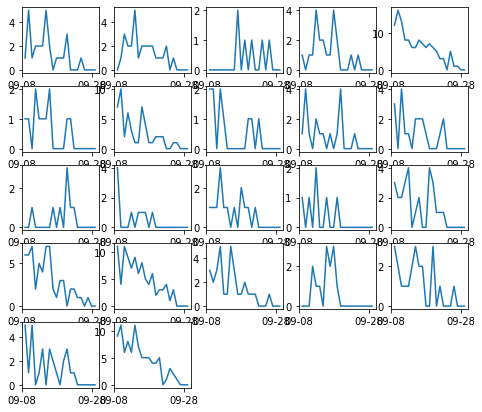

In [9]:
fig = plt.figure(figsize=(8,7))
for pos, item in enumerate(fatalR):
  ax1 = fig.add_subplot(5,5,pos+1)
  item.diff().plot()


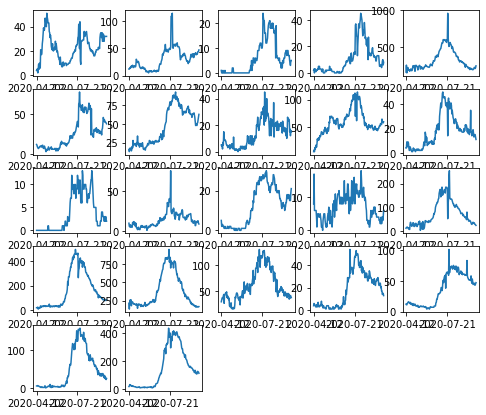

In [10]:
fig = plt.figure(figsize=(8,7))
for i in range(len(icu)):
  item=icu.iloc[i,2:]
  ax1 = fig.add_subplot(5,5,i+1)
  item.plot()

2020-04-12    0.315789
2020-04-13    0.338462
2020-04-14    0.470588
2020-04-15    0.415385
2020-04-16    0.491803
                ...   
2020-09-29    0.448529
2020-09-30    0.406475
39668              NaN
44051              NaN
44059              NaN
Name: 21, Length: 174, dtype: object


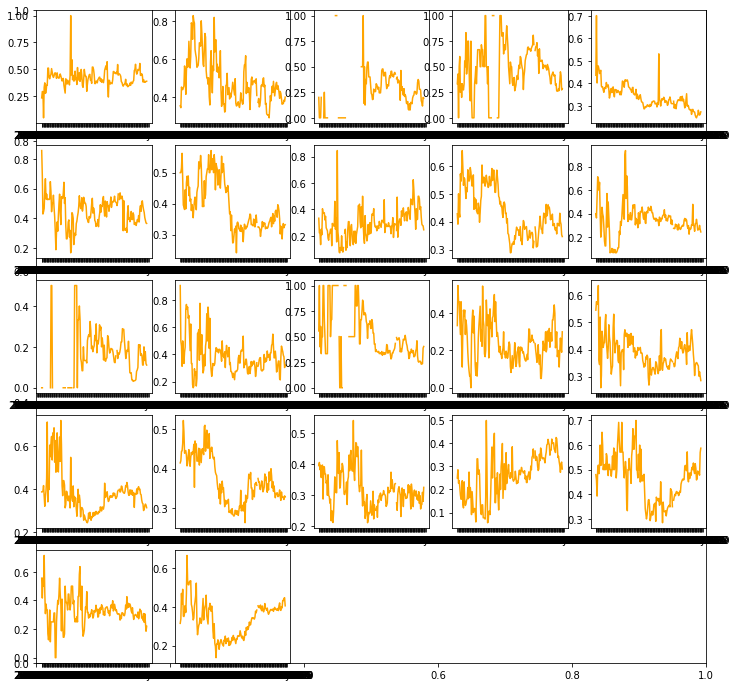

In [38]:
fig = plt.figure(figsize=(12,12))
plt.ylim(0,1)
for i in range(len(fatalR)):
  temp1=icu.iloc[i,2:]
  temp2=hosp.iloc[i,2:]
  ax1 = fig.add_subplot(5,5,i+1)
  ax1.plot(temp1/temp2,color='orange')
  #ax1.plot(fatalR[i]/casesR[i])
print(temp1/temp2)
plt.savefig('icu_hosp.pdf')

In [12]:
casesR[1][85:]

Series([], dtype: float64)

04-12         NaN
04-13    0.000000
04-14    0.034483
04-15    0.023256
04-16    0.083333
           ...   
09-26    0.003759
09-27    0.000000
09-28   -0.000000
09-29    0.000000
09-30         NaN
Length: 172, dtype: float64


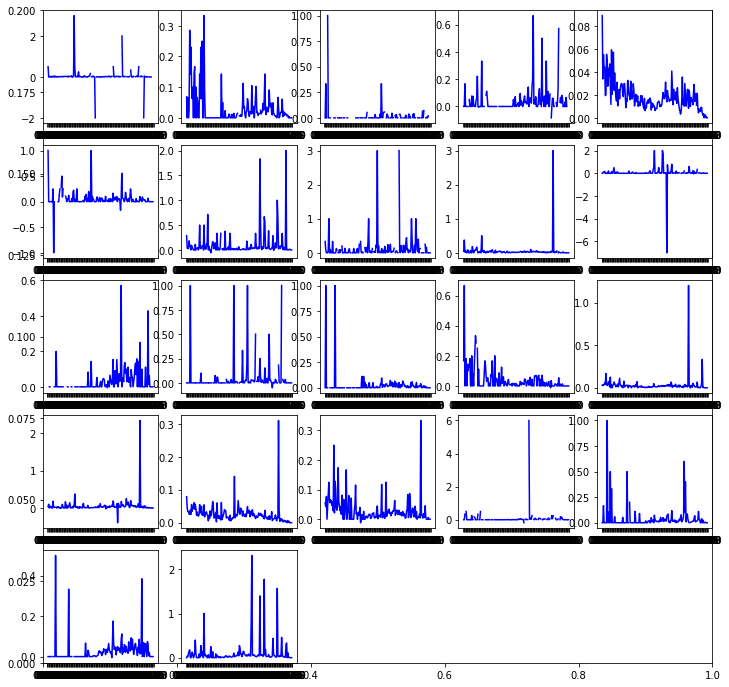

In [40]:
fatalR=[fatal[region][36:].sum(axis=1) for region in TSA1]  # Sum counties to health region
casesR=[cases[region][36:].sum(axis=1) for region in TSA2]  # Sum counties to health region

fig = plt.figure(figsize=(12,12))
plt.ylim(0,0.2)
for i in range(len(fatalR)):
  ax1 = fig.add_subplot(5,5,i+1)
  #ax1.plot(temp1/temp2)
  ax1.plot(fatalR[i].diff()/casesR[i].diff(),color='blue')
plt.savefig('fatal_cases.pdf')

In [14]:
Var1=ICUM/HM
Var2=FM/CM

In [28]:
# Chi Square testing
tb = pd.crosstab(index=Var1>np.mean(Var1), 
                           columns=Var2>np.mean(Var2))#(np.true_divide(Var2,np.mean(Var2))).astype(int)
print(tb)
from scipy.stats import chi2_contingency
tt=chi2_contingency(tb)
print(tt)

col_0  False  True 
row_0              
False      6      3
True       8      5
(0.041971916971916955, 0.837673313081118, 1, array([[5.72727273, 3.27272727],
       [8.27272727, 4.72727273]]))


In [31]:
#---------------To conduct ANOVA test----------------
from scipy.stats import f_oneway
Var1_t=Var1>np.mean(Var1)
#gp=Var1.groupby('Rt3M_int')

f_oneway(Var2[Var1_t==0],Var2[Var1_t==1])


F_onewayResult(statistic=0.87382258809181, pvalue=0.3610493824760199)

In [32]:
stats.ttest_ind(Var2[Var1_t==0],Var2[Var1_t==1])

Ttest_indResult(statistic=-0.9347847816967338, pvalue=0.3610493824760196)